In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('people.csv')

In [3]:
df.head(10)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
5,0.10,0.77,6,247,4,0,1,0,sales,low
6,0.92,0.85,5,259,5,0,1,0,sales,low
7,0.42,0.53,2,142,3,0,1,0,sales,low
8,0.45,0.54,2,135,3,0,1,0,sales,low
9,0.11,0.81,6,305,4,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [12]:
import seaborn as sns

In [13]:
sns.set()

<Axes: xlabel='left', ylabel='count'>

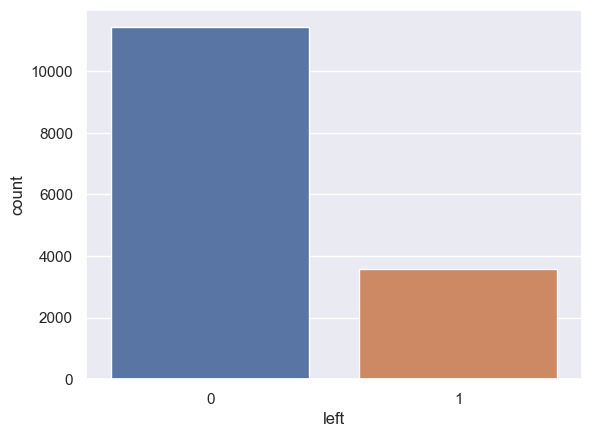

In [19]:
sns.countplot(x='left',data=df)

C:\Users\Anirudh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


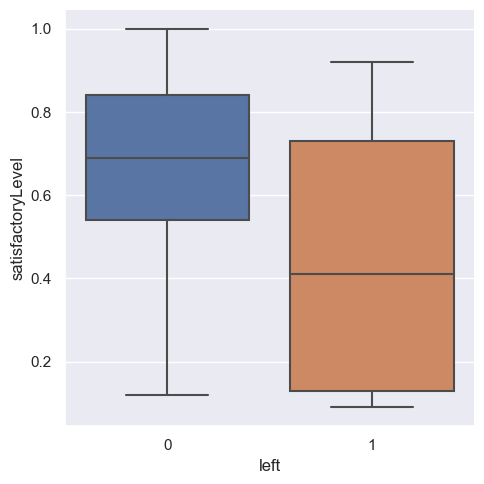

In [22]:
sns.catplot(x='left',y='satisfactoryLevel',data=df,kind='box')

C:\Users\Anirudh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


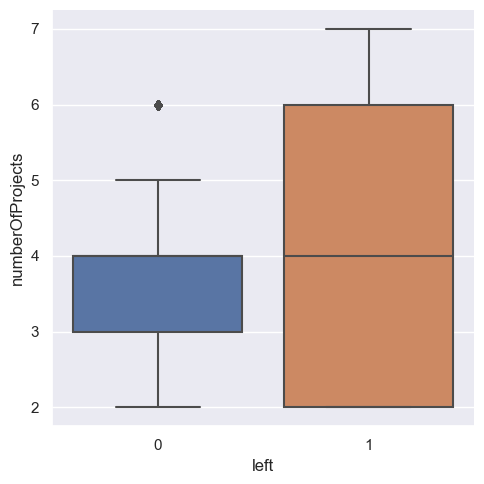

In [23]:
sns.catplot(x='left',y='numberOfProjects',data=df,kind='box')

<Axes: xlabel='numberOfProjects', ylabel='count'>

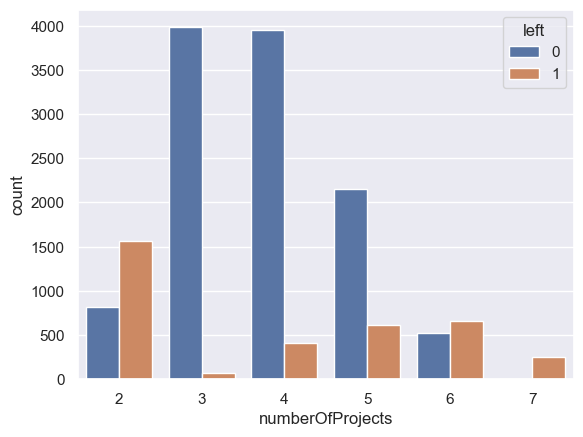

In [57]:
sns.countplot(x='numberOfProjects',data=df,hue='left')

 1) Here if the number of projects that the employee has worked is 2 then there is highest rate of leaving the jobs
 2) Here if people worked for 7 projects then there will be only leaving
 
 -- suggestion
 1) should work on 3-5 projects so that the attrition will be the least

C:\Users\Anirudh\AppData\Local\Temp\ipykernel_17932\2956653240.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['avgMonthlyHours'])


<Axes: xlabel='avgMonthlyHours', ylabel='Density'>

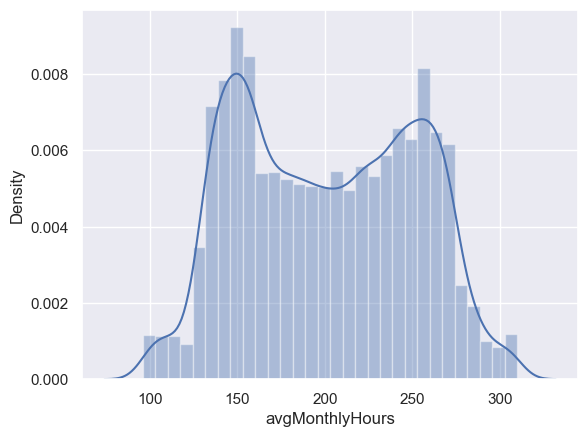

In [68]:
sns.distplot(df['avgMonthlyHours'])

<Axes: xlabel='avgMonthlyHours', ylabel='Count'>

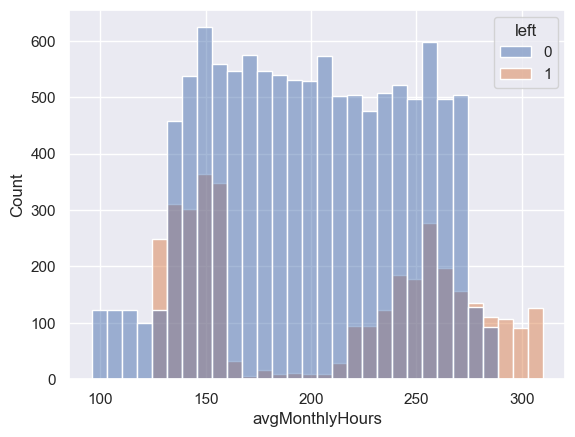

In [70]:
sns.histplot(x='avgMonthlyHours',data=df,hue='left')

1) majority of people have spent for average time of 150 -250 range
2) the plot is not normally distributed
3) people working for 150 -250 hours are retaining as well as leaving too
4) people working for the range of 300 is leaving the most

suggestion
1) 200 hr should be the sufficient amount to work and if it is more  then it is a burden

In [71]:
df[df['promotionInLast5years']==1].groupby('left').count()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary
left,,,,,,,,,
0,300,300,300,300,300,300,300,300,300
1,19,19,19,19,19,19,19,19,19


1) out of total 319 who got promotion 300 didnt leave the company 

In [72]:
df[df['promotionInLast5years']==0].groupby('left').count()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary
left,,,,,,,,,
0,11128,11128,11128,11128,11128,11128,11128,11128,11128
1,3552,3552,3552,3552,3552,3552,3552,3552,3552


1) so more people are leaving in who got didnt get promotion 

-- inference

1) timely promotion must be provided

<Axes: xlabel='dept', ylabel='count'>

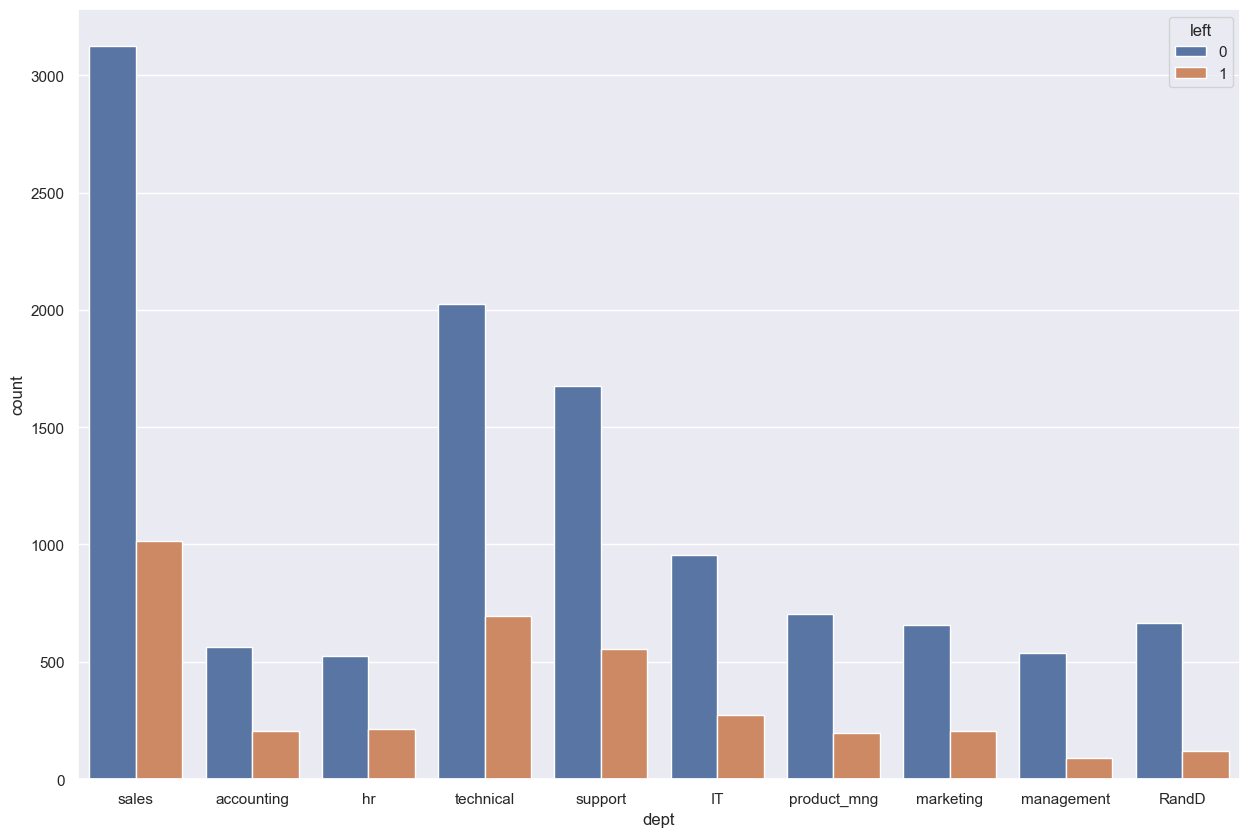

In [77]:
plt.figure(figsize=(15,10))
sns.countplot(x='dept',data=df,hue='left')

1) people from sales , technical , support are leaving the most

-- suggestion

1) more hr should be hired 
2) more incentives
3) more bonus must be provided

C:\Users\Anirudh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


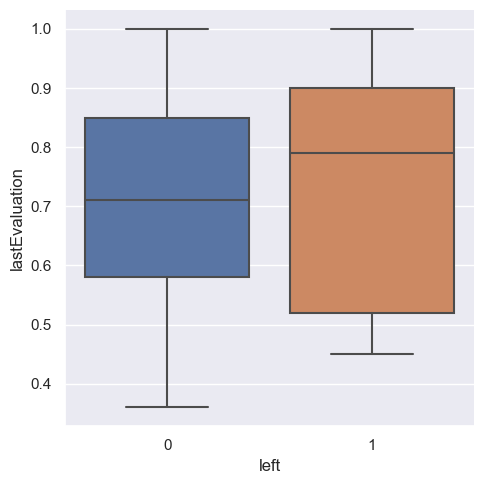

In [24]:
sns.catplot(x='left',y='lastEvaluation',data=df,kind='box')

C:\Users\Anirudh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


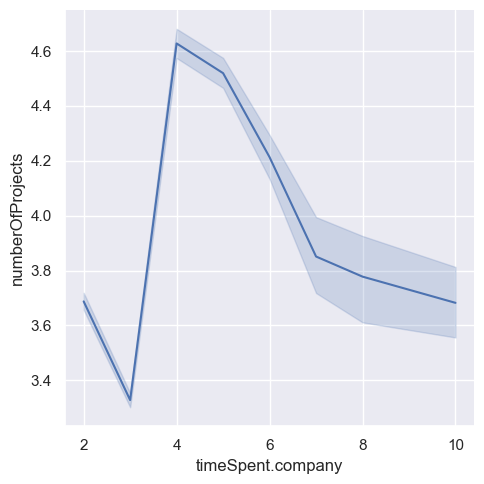

In [27]:
sns.relplot(x='timeSpent.company',y='numberOfProjects',data=df,kind='line')

C:\Users\Anirudh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


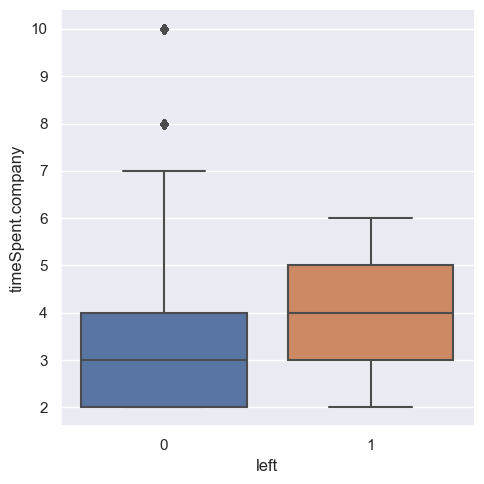

In [28]:
sns.catplot(x='left',y='timeSpent.company',data=df,kind='box')

<Axes: xlabel='timeSpent.company', ylabel='count'>

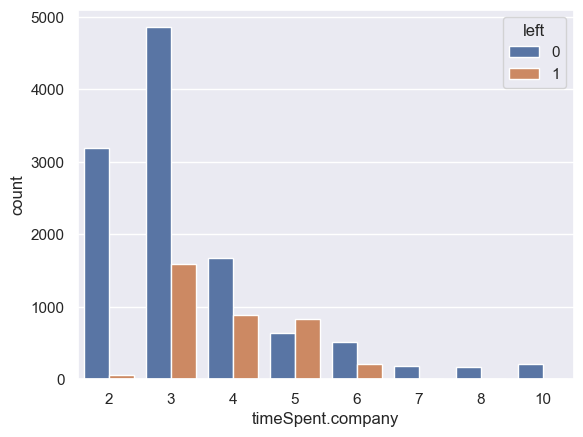

In [56]:
sns.countplot(x='timeSpent.company',data=df,hue='left')

<Axes: >

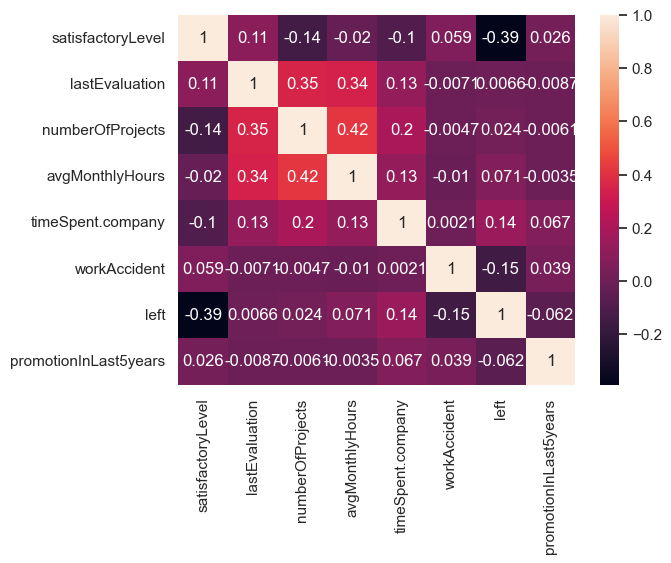

In [30]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='workAccident', ylabel='count'>

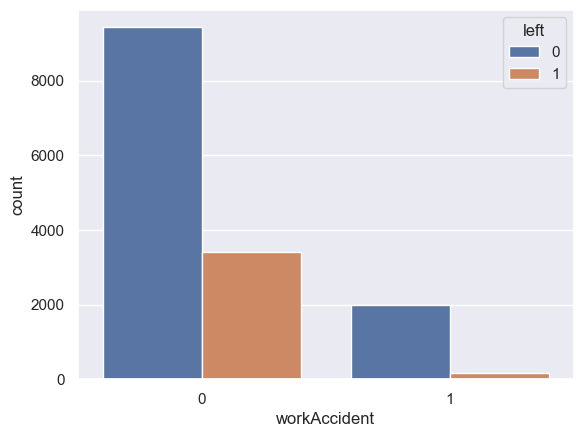

In [55]:
sns.countplot(x='workAccident',data=df,hue='left')

In [48]:
df['salary'].replace(['low', 'medium','high'],
                        [0, 0.5,1], inplace=True)
sns.countplot(x='salary',data=df,hue='left')

In [49]:
df['salary']

0        0.0
1        0.5
2        0.5
3        0.0
4        0.0
        ... 
14994    0.5
14995    0.0
14996    0.0
14997    0.0
14998    0.0
Name: salary, Length: 14999, dtype: float64

In [47]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

<Axes: xlabel='salary', ylabel='count'>

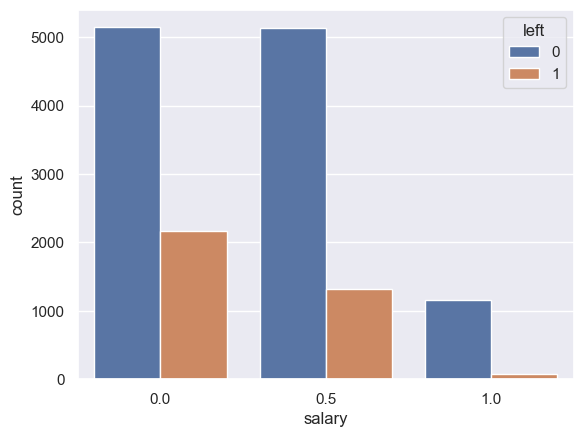

In [53]:
sns.countplot(x='salary',data=df,hue='left')

In [78]:
df['salary'].value_counts()

salary
0.0    7316
0.5    6446
1.0    1237
Name: count, dtype: int64

1) low paying and medum paid people are leaving the most in the compny
2) even though low salary is given then too leaving is more
3) 7316 people are paid low
4) people leaving for high paid is less

suggestion
1) low piad people should be paid more




In [54]:
df['salary'].value_counts()

salary
0.0    7316
0.5    6446
1.0    1237
Name: count, dtype: int64